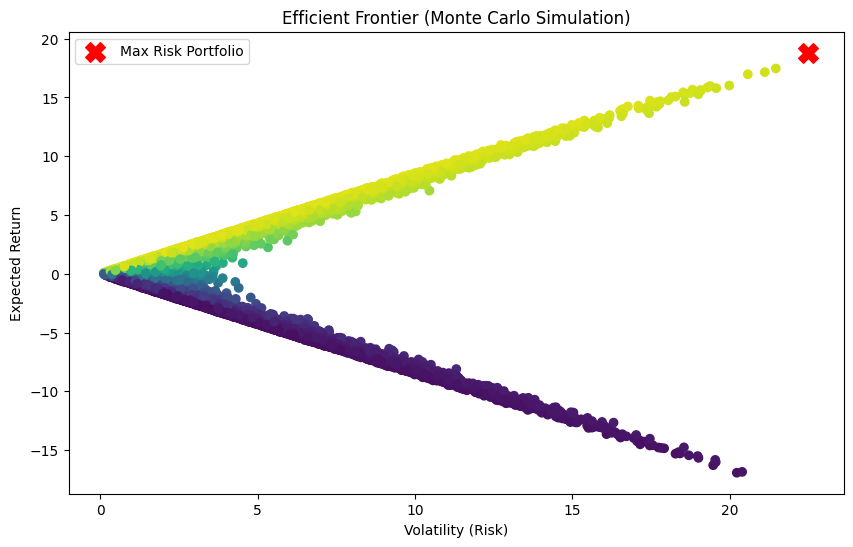

Structure of the Most Risky Portfolio:
GLTR     0.156119
IRAO     0.059200
RTKM     0.051116
NMTP     0.041924
UTAR     0.034534
GAZP     0.027738
KMAZ     0.024584
DVEC     0.021741
CHMF     0.020576
MTSS     0.018777
PIKK     0.009229
AFKS     0.008060
TRNFP    0.004110
MAGN    -0.000280
MGNT    -0.004245
ROSN    -0.006527
IRKT    -0.008369
LKOH    -0.009871
SNGS    -0.010469
TRMK    -0.021488
MRKC    -0.022143
AFLT    -0.024040
TTLK    -0.034749
TATN    -0.035545
PLZL    -0.042264
NVTK    -0.057193
SBER    -0.059207
VTBR    -0.059714
GMKN    -0.059921
LSRG    -0.066268
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'df_prices.csv'
data = pd.read_csv(file_path, index_col=0, parse_dates=True)

returns = data.pct_change().dropna()

num_portfolios = 10000

port_returns = []
port_volatility = []
port_weights = []
num_assets = len(returns.columns)

# Генерируем случайные портфели
for _ in range(num_portfolios):
    weights = np.random.randn(num_assets)  
    weights /= np.sum(np.abs(weights)) 
    
    port_return = np.sum(weights * returns.mean()) * 252 
    port_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    
    port_returns.append(port_return)
    port_volatility.append(port_stddev)
    port_weights.append(weights)

# Преобразуем в DataFrame
efficient_portfolios = pd.DataFrame({
    'Return': port_returns,
    'Volatility': port_volatility
})

max_risk_idx = np.argmax(port_volatility)
max_risk_weights = port_weights[max_risk_idx]

plt.figure(figsize=(10, 6))
plt.scatter(efficient_portfolios['Volatility'], efficient_portfolios['Return'], c=efficient_portfolios['Return']/efficient_portfolios['Volatility'], cmap='viridis', marker='o')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

plt.scatter(efficient_portfolios.loc[max_risk_idx, 'Volatility'], efficient_portfolios.loc[max_risk_idx, 'Return'], color='red', marker='X', s=200, label='Max Risk Portfolio')
plt.legend()
plt.show()

max_risk_portfolio = pd.Series(max_risk_weights, index=returns.columns)
print("Structure of the Most Risky Portfolio:")
print(max_risk_portfolio.sort_values(ascending=False))
